In [ ]:
from collections import defaultdict
import pandas as pd

# Sample corpus
corpus = """
Nory was a Catholic because her mother was a Catholic, and Nory's mother was a Catholic because her father was a Catholic, and her father was a Catholic because his mother was a Catholic, or had been.
"""

# Function to generate N-grams from the input text
def generate_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = tuple(words[i:i + n])
        ngrams.append(ngram)
    return ngrams

# Function to create an N-gram frequency count table
def ngram_count_table(corpus, n):
    ngram_counts = defaultdict(int)
    sentences = corpus.strip().split('\n')

    for sentence in sentences:
        ngrams = generate_ngrams(sentence, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1

    df = pd.DataFrame(list(ngram_counts.items()), columns=["N-gram", "Count"])
    df = df.sort_values(by="Count", ascending=False).reset_index(drop=True)
    return df




In [ ]:
n = 1  # Change this value to the desired N-gram size

# Generate and print the N-gram frequency count table
ngram_table = ngram_count_table(corpus, n)
print(ngram_table)

          N-gram  Count
0         (was,)      6
1           (a,)      6
2    (Catholic,)      3
3     (because,)      3
4         (her,)      3
5      (mother,)      3
6   (Catholic,,)      3
7         (and,)      2
8      (father,)      2
9        (Nory,)      1
10     (Nory's,)      1
11        (his,)      1
12         (or,)      1
13        (had,)      1
14      (been.,)      1


In [ ]:
n =  2 # Change this value to the desired N-gram size

# Generate and print the N-gram frequency count table
ngram_table = ngram_count_table(corpus, n)
print(ngram_table)

                 N-gram  Count
0              (was, a)      6
1         (a, Catholic)      3
2   (Catholic, because)      3
3         (mother, was)      3
4        (a, Catholic,)      3
5        (because, her)      2
6      (Catholic,, and)      2
7         (her, father)      2
8         (father, was)      2
9           (Nory, was)      1
10       (because, his)      1
11            (or, had)      1
12      (Catholic,, or)      1
13        (his, mother)      1
14        (and, Nory's)      1
15           (and, her)      1
16     (Nory's, mother)      1
17        (her, mother)      1
18         (had, been.)      1


In [ ]:
n =  3 # Change this value to the desired N-gram size

# Generate and print the N-gram frequency count table
ngram_table = ngram_count_table(corpus, n)
print(ngram_table)

                      N-gram  Count
0     (a, Catholic, because)      3
1           (mother, was, a)      3
2        (was, a, Catholic,)      3
3         (was, a, Catholic)      3
4   (Catholic, because, her)      2
5        (a, Catholic,, and)      2
6         (her, father, was)      2
7           (father, was, a)      2
8             (Nory, was, a)      1
9         (and, her, father)      1
10      (Catholic,, or, had)      1
11        (a, Catholic,, or)      1
12        (his, mother, was)      1
13    (because, his, mother)      1
14  (Catholic, because, his)      1
15     (Nory's, mother, was)      1
16     (Catholic,, and, her)      1
17    (because, her, father)      1
18     (and, Nory's, mother)      1
19  (Catholic,, and, Nory's)      1
20        (her, mother, was)      1
21    (because, her, mother)      1
22          (or, had, been.)      1


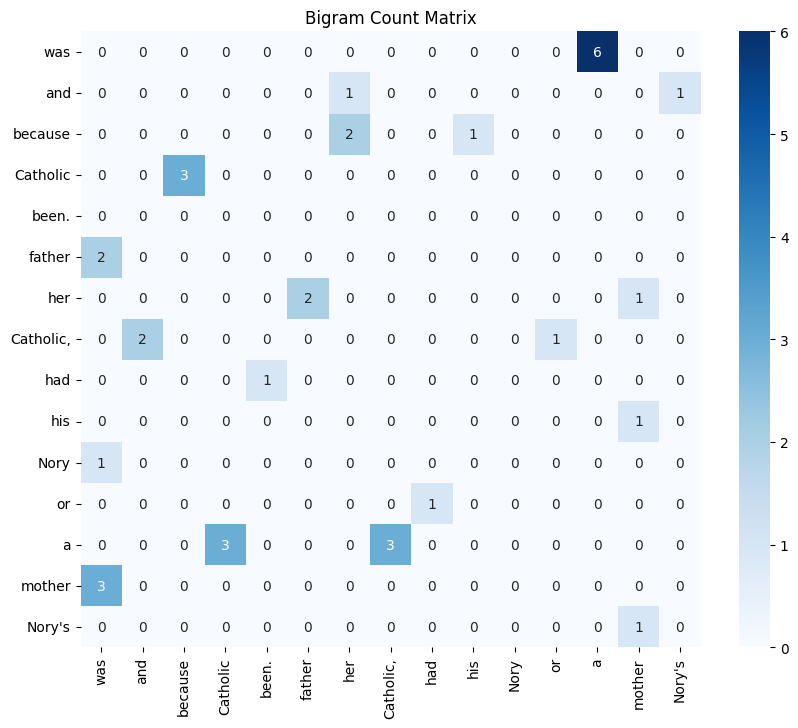

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample corpus
corpus = "Nory was a Catholic because her mother was a Catholic, and Nory's mother was a Catholic because her father was a Catholic, and her father was a Catholic because his mother was a Catholic, or had been."

# Function to generate bigrams from the input text
def generate_bigrams(text):
    words = text.split()
    bigrams = []
    for i in range(len(words) - 1):
        bigram = (words[i], words[i + 1])
        bigrams.append(bigram)
    return bigrams

# Function to create a bigram count matrix
def bigram_count_matrix(corpus):
    words = corpus.split()
    unique_words = list(set(words))
    matrix_size = len(unique_words)

    # Initialize a matrix with zeros
    count_matrix = np.zeros((matrix_size, matrix_size), dtype=int)

    # Generate bigrams from the corpus
    bigrams = generate_bigrams(corpus)

    # Populate the count matrix
    for bigram in bigrams:
        if bigram[0] in unique_words and bigram[1] in unique_words:
            i = unique_words.index(bigram[0])
            j = unique_words.index(bigram[1])
            count_matrix[i][j] += 1

    # Create a DataFrame for the count matrix
    df = pd.DataFrame(count_matrix, index=unique_words, columns=unique_words)

    return df

# Generate the bigram count matrix
count_matrix = bigram_count_matrix(corpus)

# Plot the count matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(count_matrix, cmap='Blues', annot=True, fmt='d')
plt.title('Bigram Count Matrix')
plt.show()


<ipython-input-9-5d7695b775e4>:39: RuntimeWarning: invalid value encountered in divide
  probability_matrix = count_matrix / row_sums[:, np.newaxis]


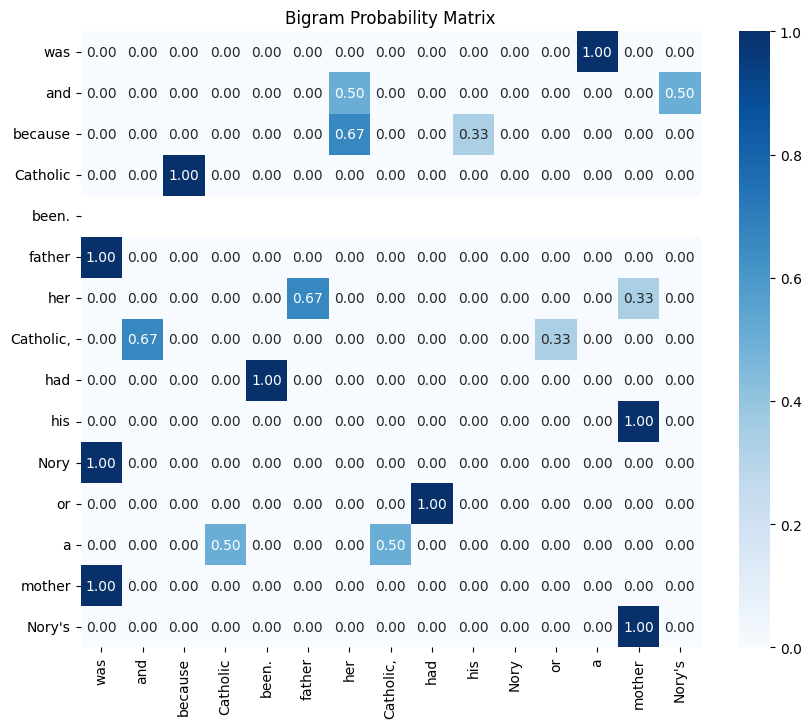

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample corpus
corpus = "Nory was a Catholic because her mother was a Catholic, and Nory's mother was a Catholic because her father was a Catholic, and her father was a Catholic because his mother was a Catholic, or had been."

# Function to generate bigrams from the input text
def generate_bigrams(text):
    words = text.split()
    bigrams = []
    for i in range(len(words) - 1):
        bigram = (words[i], words[i + 1])
        bigrams.append(bigram)
    return bigrams

# Function to create a bigram probability matrix
def bigram_probability_matrix(corpus):
    words = corpus.split()
    unique_words = list(set(words))
    matrix_size = len(unique_words)

    # Initialize a matrix with zeros
    count_matrix = np.zeros((matrix_size, matrix_size), dtype=int)

    # Generate bigrams from the corpus
    bigrams = generate_bigrams(corpus)

    # Populate the count matrix
    for bigram in bigrams:
        if bigram[0] in unique_words and bigram[1] in unique_words:
            i = unique_words.index(bigram[0])
            j = unique_words.index(bigram[1])
            count_matrix[i][j] += 1

    # Calculate probabilities
    row_sums = count_matrix.sum(axis=1)
    probability_matrix = count_matrix / row_sums[:, np.newaxis]

    # Create a DataFrame for the probability matrix
    df = pd.DataFrame(probability_matrix, index=unique_words, columns=unique_words)

    return df

# Generate the bigram probability matrix
probability_matrix = bigram_probability_matrix(corpus)

# Plot the probability matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(probability_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.title('Bigram Probability Matrix')
plt.show()
